In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Parameters
omega0 = 1                       #angular frequency

x0 = 1                           #initial position
v0 = 0                           #initial velocity
beta = 0.5
n = 2

tmax = 100                       #max integration time
dt = 0.01                        #time step
Nt = int(np.floor(tmax/dt)+1)    #number of time steps (fixed by tmax, dt)

t = np.linspace(0,tmax,Nt)       #array of time values
x = np.zeros(Nt)                 #array to store x values
v = np.zeros(Nt)                 #array to store v values

x[0] = x0
v[0] = v0

$x_{0}e^{\frac{-\beta\omega_{0}^2}{4k^{2}m^{2}}t} = A$

$\frac{1}{\frac{2\beta\omega_{0}^{2}t}{3km}+x_{0}^{-1}} = A$

$\frac{-\beta}{km}t+x_{0} = A$

In [3]:
#time evolution
i=0
fv = beta*np.abs(v[i])**(n-1)*v[i]
for i in range(0,Nt-1):
   
    v[i+1] = v[i] + dt*(-(omega0**2)*x[i]) - fv #Simple forward-Euler integration
    x[i+1] = x[i] + dt*v[i+1]                   #BUT using v[i+1] here actually improves the 
                                                #accuracy more than you'd expect if you ever
                                                #coded RK4 from scratch (that's still better)

## UNDAMPED

In [4]:
#analytic undamped
xa = x0*np.cos(omega0*t)

#for n = 0
#xa = x0*np.cos(omega0*t)*((-beta*t)/(k*m))
#analytic solution for n = 1
#xa = x0*np.sin(omega0*t)*np.exp((-beta*omega0**2*t)/(4*k**2*m**2))
#for n = 2
#xa = x0*np.sin(omega0*t)*1/(((2*beta*omega0**2*t)/(3*k*m))+x0**(-1))

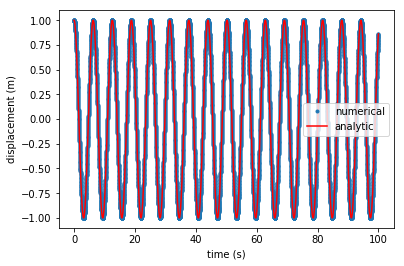

In [5]:
plt.plot(t,x, '.')
plt.plot(t,xa, 'r-')
plt.legend(['numerical','analytic'])
plt.xlabel('time (s)')
plt.ylabel('displacement (m)')
plt.show()

Text(0.5,1,'Error in Euler Integration')

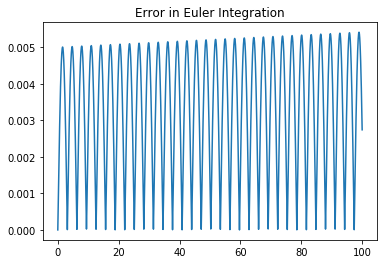

In [6]:
plt.figure()
plt.plot(t,np.abs(xa-x))
plt.title('Error in Euler Integration')

1. At long time scales, the error in the Euler numerical integration grows significantly in time.

2. The error appears to grow slightly more than linearly with time, though not much more. The error can be significantly lowered with lower time steps. With a $dt$ of $0.01$, our error reached $0.6$ at a time of $100$, whereas with a $dt$ of $0.001$ our error at the same time was $0.05$.

3. Adding some basic RK4 fitting gives a basically non-increasing error or $0.0005$ with the previous $dt$.

7. The approximations seems somewhat weak--the n=0 analytic expression is especially off. It grows in time instead of depreciating! The n=2 is very close, especially at long time scales. The n=1 is similarly good, though less accurate than the n=2 case.

## N = 0 CASE

In [7]:
#This case needs a special condition--eventually the A(t) function goes negative--at this
#point the amplitude should die to 0.
def A0(x0,t):
    if (-beta*t/(k*m) + x0) > 0:
        return (-beta*t/(k*m) + x)
    else: 
        return 0.0

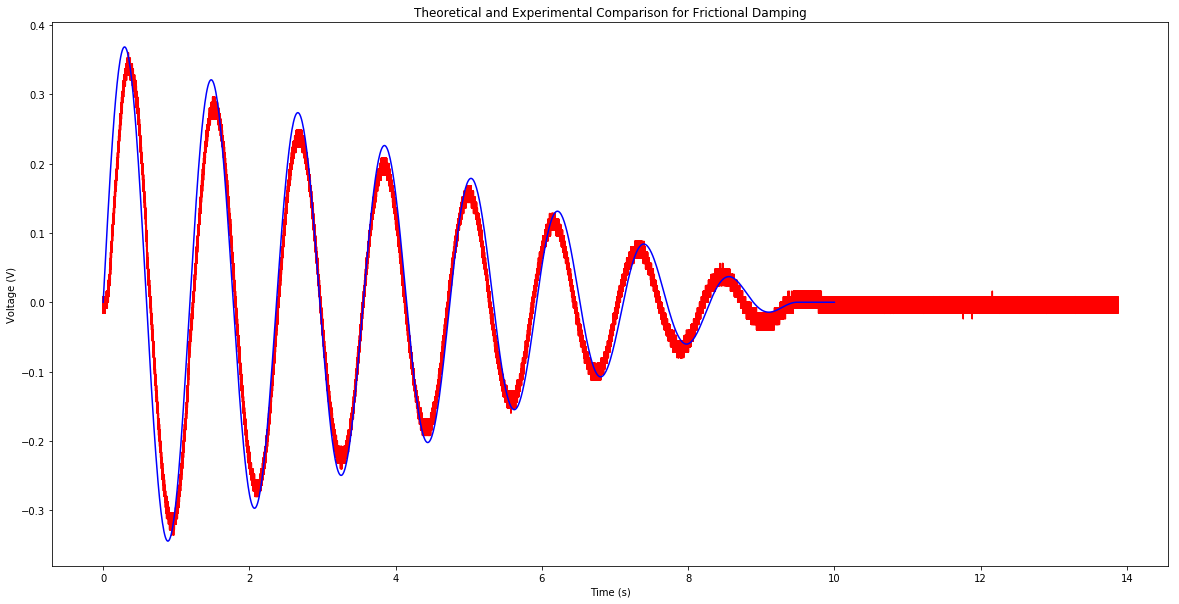

In [8]:
drag2 = np.genfromtxt('Drag2.csv', delimiter=',')

k = 5
m = 1
x = .38
w = 5.3
beta = 0.2

t = np.linspace(0,10,1000)

a0 = np.zeros(np.size(t))
for i in range(0,np.size(t)):
    a0[i] = A0(x,t[i])*np.sin(w*t[i])

drag2t = drag2[27153:, 0]
drag2v = drag2[27153:, 1]
drag2t = drag2t-drag2t[0]

plt.figure(figsize=[20,10])
plt.plot(drag2t,drag2v, 'r-',label='experimental')
plt.plot(t,a0,'b-',label='theoretical')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Theoretical and Experimental Comparison for Frictional Damping')
plt.show()

In [9]:
xpeaks=[]
tpeaks=[]
a=10
for i in range(a,np.size(t)-a):
    if((a0[i]-a0[i-a])*(a0[i+a]-a0[i])<0):
        xpeaks.append(np.abs(a0[i]))
        tpeaks.append(np.abs(t[i]))

In [40]:
line = lambda x, m, b: m*x+b

xA = np.asarray(xpeaks)
tA = np.asarray(tpeaks)

fit, covar = curve_fit(line, tpeaks, xpeaks)
err = np.sqrt(np.diag(covar))

print(fit)

[-0.03962794  0.37570944]


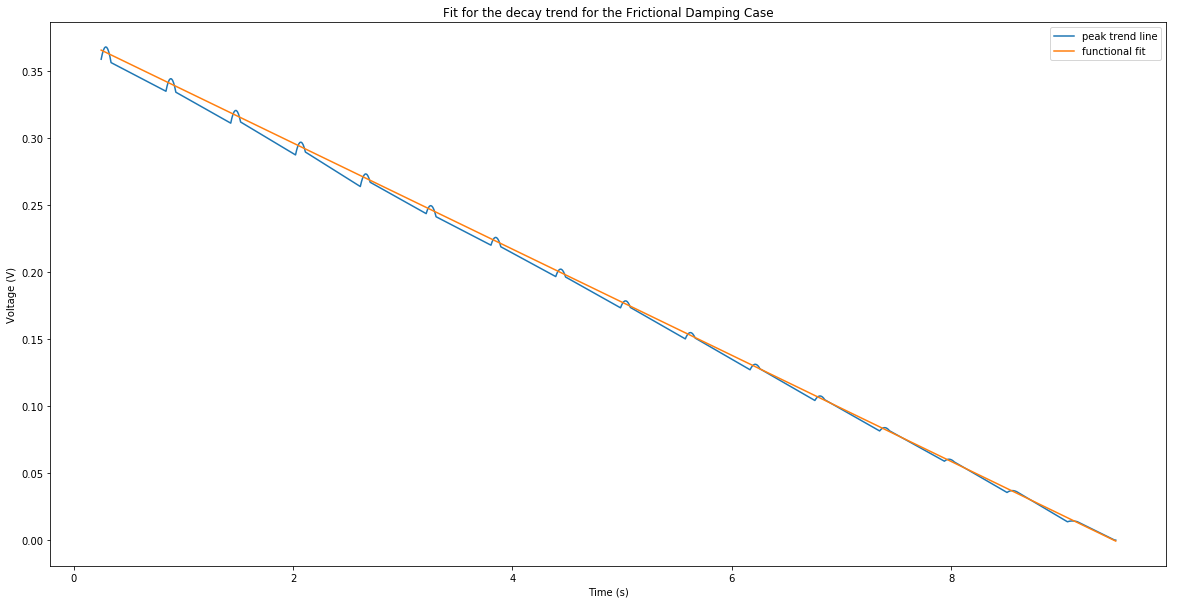

In [34]:
plt.figure(figsize=[20,10])
plt.plot(tpeaks,xpeaks,label='peak trend line')
plt.plot(tpeaks, line(tA, *fit),label='functional fit')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Fit for the decay trend for the Frictional Damping Case')
plt.show()

## N = 1

In [12]:
def A1(x,t):
    return x*np.exp(-beta*w*t/(4*m*k))

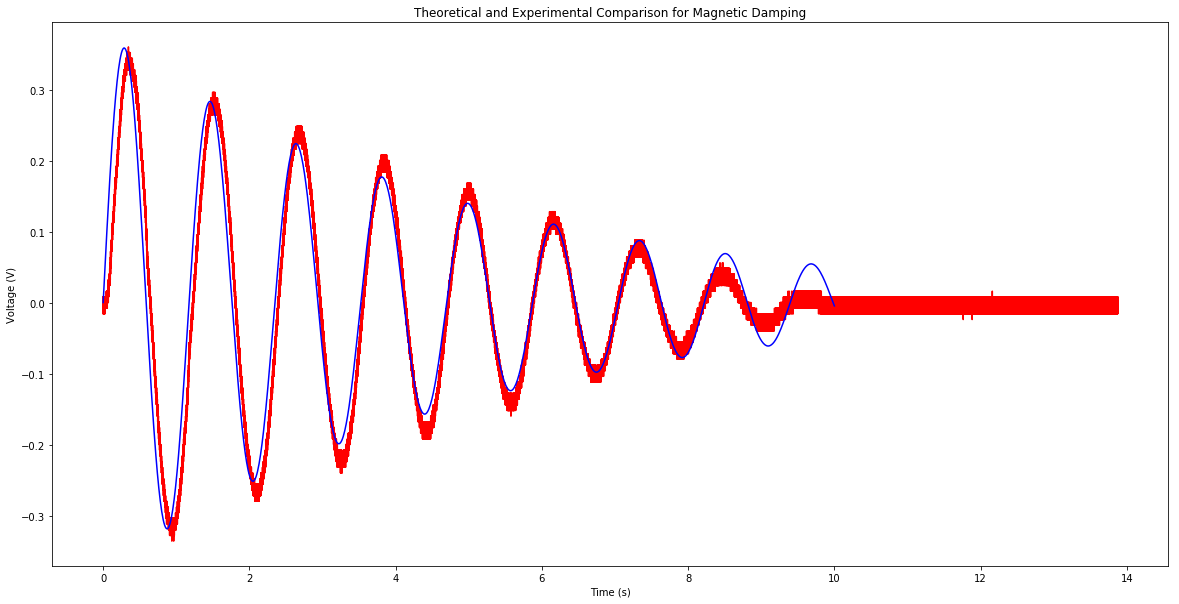

In [13]:
drag1 = np.genfromtxt('Drag1.csv', delimiter=',')

k = 2
m = 1
x = .38
w = 5.35
beta = 0.3

t = np.linspace(0,10,1000)

drag1t = drag1[:, 0]
drag1v = drag1[:, 1]

a1 = A1(x,t)*np.sin(w*t)

plt.figure(figsize=[20,10])
plt.plot(drag2t,drag2v, 'r-',label='experimental')
plt.plot(t,a1,'b-',label='theoretical')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Theoretical and Experimental Comparison for Magnetic Damping')
plt.show()

[ 1.19137795e-04 -1.20457673e-02  3.63717978e-01]


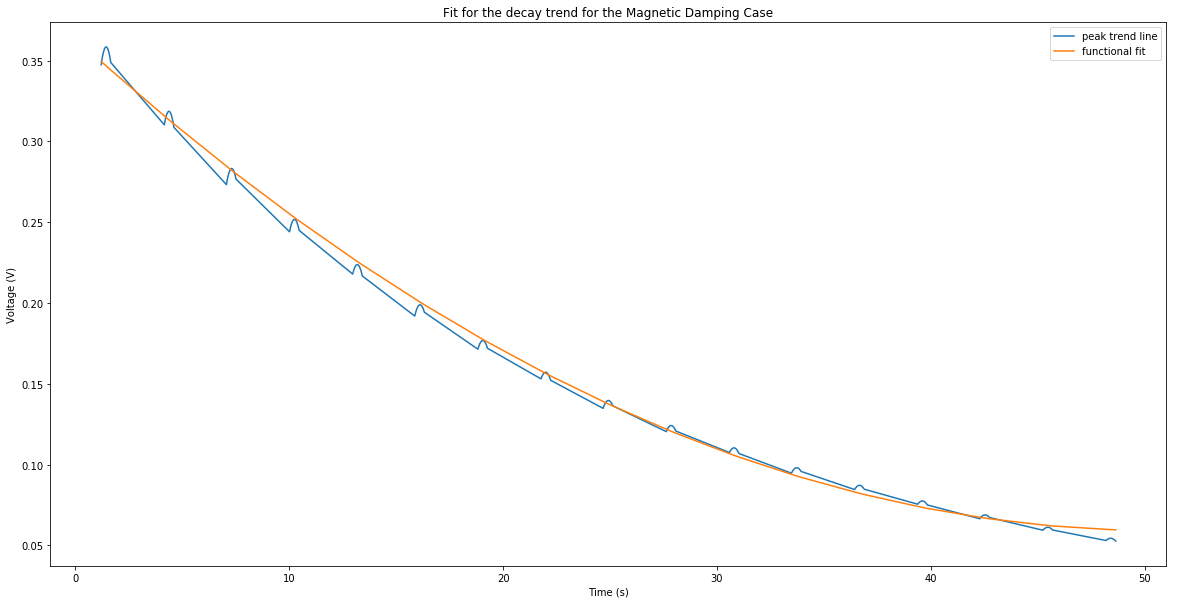

In [37]:
xpeaks2=[]
tpeaks2=[]
a=10
for i in range(a,np.size(t)-a):
    if((a1[i]-a1[i-a])*(a1[i+a]-a1[i])<0):
        xpeaks2.append(np.abs(a1[i]))
        tpeaks2.append(np.abs(t[i]))

        
quad = lambda x,a,b,c: a*x**2+b*x+c
xA2 = np.asarray(xpeaks2)
tA2 = np.asarray(tpeaks2)
fit2, covar2 = curve_fit(quad, tpeaks2, xpeaks2)
err = np.sqrt(np.diag(covar2))
print(fit2)

plt.figure(figsize=[20,10])
plt.plot(tpeaks2,xpeaks2,label='peak trend line')
plt.plot(tpeaks2, quad(tA2, *fit2),label='functional fit')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Fit for the decay trend for the Magnetic Damping Case')
plt.show()

## N = 2

In [15]:
def A2(x,t):
    return x/(1+(2*beta*t)/(m*w*k))

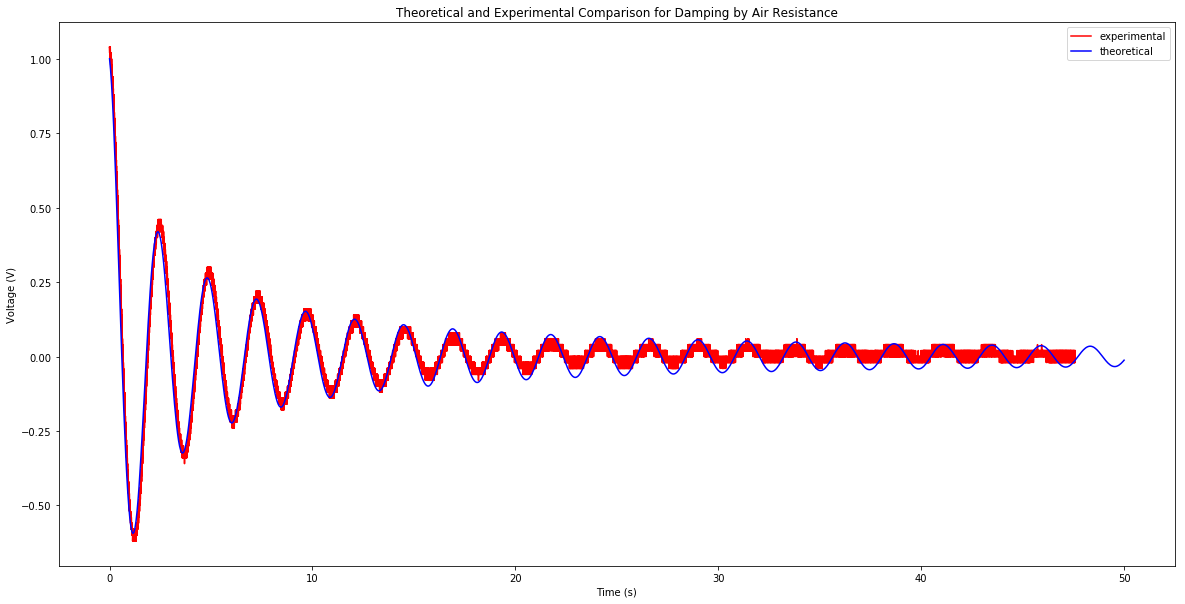

In [27]:
paddle = np.genfromtxt('PaddleData.csv', delimiter=',')

k = .1
m = 4
x = 1
w = 2.6

t = np.linspace(0,50,1000)

paddlet = paddle[4:,0]
paddlev = paddle[4:,1]

a2 = A2(x,t)*np.cos(w*t)

plt.figure(figsize=[20,10])
plt.plot(paddlet,paddlev, 'r-',label='experimental')
plt.plot(t,a2,'b-',label='theoretical')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend(loc='best')
plt.title('Theoretical and Experimental Comparison for Damping by Air Resistance')
plt.show()

In [18]:
expon = lambda x,a,lam: a*np.exp(x*lam)

[ 0.53470449 -0.11030997]


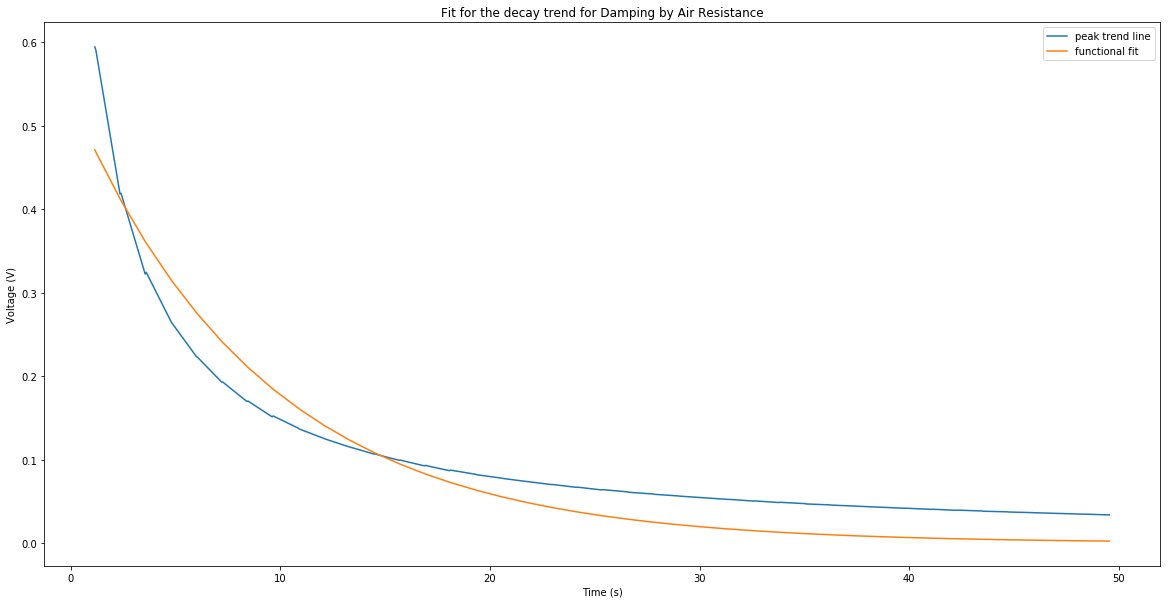

In [39]:
xpeaks3=[]
tpeaks3=[]
a=2
for i in range(a,np.size(t)-a):
    if((a2[i]-a2[i-a])*(a2[i+a]-a2[i])<0):
        xpeaks3.append(np.abs(a2[i]))
        tpeaks3.append(np.abs(t[i]))

xA3 = np.asarray(xpeaks3)
tA3 = np.asarray(tpeaks3)

fit3, covar3 = curve_fit(expon, tpeaks3, xpeaks3,p0=(1,0))
err = np.sqrt(np.diag(covar3))
print(fit3)

plt.figure(figsize=[20,10])
plt.plot(tpeaks3,xpeaks3,label='peak trend line')
plt.plot(tpeaks3, expon(tA3, *fit3),label='functional fit')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Fit for the decay trend for Damping by Air Resistance')
plt.show()